In [1]:
# Iporting required libraries

In [20]:
import pandas as pd # Pandas to handle dataframe
import numpy as np # to perform numerical operations on dataframe
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder # Import labelencoder module for encoding categorical values



# from sklearn.tree import export_graphviz
# from sklearn import tree
# from IPython.display import Image  
# import pydotplus

In [3]:
# reading the data using pandas and stroing it to the variable df

In [4]:
main_df = pd.read_csv("data (1).csv")

In [5]:
main_df.head()

,Age,Education Years,Experience Years,Relationship Status,Income
0,58,16,16,Married,71370
1,43,20,36,Unmarried,51649
2,56,18,32,Unmarried,33283
3,55,16,20,Unmarried,30531
4,31,11,3,Unmarried,53201


In [6]:
# Getting informed about the data- column names, data type, null values

In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  100 non-null    int64 
 1   Education Years      100 non-null    int64 
 2   Experience Years     100 non-null    int64 
 3   Relationship Status  100 non-null    object
 4   Income               100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [8]:
# Dataset description statistical information about the dataset 

In [9]:
main_df.describe()

,Age,Education Years,Experience Years,Income
count,100.000000,100.000000,100.000000,100.000000
mean,38.180000,14.410000,20.660000,55516.030000
std,12.038138,3.728392,11.588239,14993.071081
min,20.000000,8.000000,0.000000,30021.000000
25%,27.000000,11.000000,10.000000,43656.250000
50%,38.000000,15.000000,22.000000,54272.500000
75%,47.000000,18.000000,31.000000,67996.250000
max,60.000000,20.000000,40.000000,79820.000000


In [10]:
# Function to add ythe column label to perform the classification machine learning algorithm

In [11]:
def income_binary(df):

    df['Income_binary'] = (df['Income'] > 50000).astype(int)
        
    return df
   

In [12]:
converted_col_income_binary = income_binary(main_df)
converted_col_income_binary

,Age,Education Years,Experience Years,Relationship Status,Income,Income_binary
0,58,16,16,Married,71370,1
1,43,20,36,Unmarried,51649,1
2,56,18,32,Unmarried,33283,0
3,55,16,20,Unmarried,30531,0
4,31,11,3,Unmarried,53201,1
...,...,...,...,...,...,...
95,40,18,9,Unmarried,53822,1
96,22,17,40,Married,43881,0
97,40,9,20,Divorced,44607,0
98,58,14,11,Unmarried,53706,1


In [13]:
one_hot_encoded_df = pd.get_dummies(main_df, columns=['Relationship Status'])

In [14]:
X=one_hot_encoded_df.drop(['Income_binary','Income'], axis=1)
y= one_hot_encoded_df[['Income_binary']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,  test_size=0.25, shuffle=True)

In [16]:
#creating the Decision tree clasifier object
clf = DecisionTreeClassifier()

#Train the model 
clf = clf.fit(X_train,y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

In [17]:
#Evaluating the Model 


In [18]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6


# creating confusion matrix

In [19]:
cm_clf = metrics.confusion_matrix(y_test,y_pred)

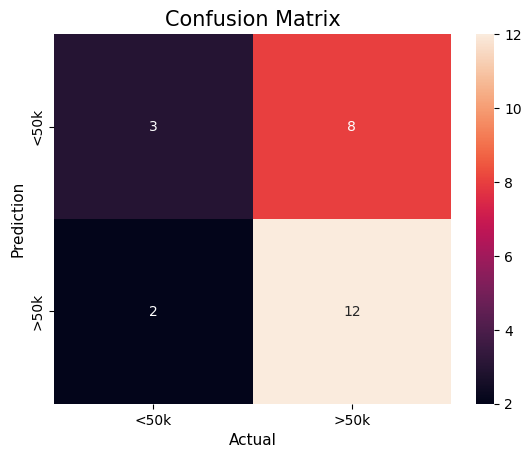

In [22]:
sns.heatmap(cm_clf,annot=True,fmt='g',
           xticklabels=['<50k','>50k'],
           yticklabels=['<50k','>50k'])
plt.ylabel('Prediction',fontsize=11)
plt.xlabel('Actual',fontsize=11)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [19]:
# # Visualize the Decision Tree
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=X.columns,  
#                                 class_names=['0','1'],  
#                                 filled=True, rounded=True,  
#                                 special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

In [23]:
# Creating Decison Tree classifier (entropy,gini)
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)
# Train Decision Tree Clasifier
clf = clf.fit(X_train,y_train)
#Predict the response for the test dataset
y_pred = clf.predict(X_test)

In [24]:
# Model Accuracy, How often the classifier is correct?
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.56


In [25]:
cm_clf = metrics.confusion_matrix(y_test,y_pred)

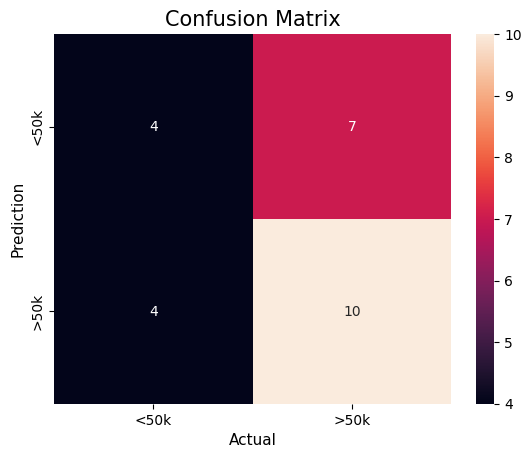

In [26]:
sns.heatmap(cm_clf,annot=True,fmt='g',
           xticklabels=['<50k','>50k'],
           yticklabels=['<50k','>50k'])
plt.ylabel('Prediction',fontsize=11)
plt.xlabel('Actual',fontsize=11)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [27]:
# Trying without implementing hot encoding to the Martitial status  

In [28]:
df_main_wo_ohe = converted_col_income_binary.copy()
df_main_wo_ohe

,Age,Education Years,Experience Years,Relationship Status,Income,Income_binary
0,58,16,16,Married,71370,1
1,43,20,36,Unmarried,51649,1
2,56,18,32,Unmarried,33283,0
3,55,16,20,Unmarried,30531,0
4,31,11,3,Unmarried,53201,1
...,...,...,...,...,...,...
95,40,18,9,Unmarried,53822,1
96,22,17,40,Married,43881,0
97,40,9,20,Divorced,44607,0
98,58,14,11,Unmarried,53706,1


In [29]:
df_main_wo_ohe.head()

,Age,Education Years,Experience Years,Relationship Status,Income,Income_binary
0,58,16,16,Married,71370,1
1,43,20,36,Unmarried,51649,1
2,56,18,32,Unmarried,33283,0
3,55,16,20,Unmarried,30531,0
4,31,11,3,Unmarried,53201,1


In [30]:
le = LabelEncoder()
df_main_wo_ohe['Relationship Status'] = le.fit_transform(
    df_main_wo_ohe['Relationship Status'])

In [31]:
df_main_wo_ohe

,Age,Education Years,Experience Years,Relationship Status,Income,Income_binary
0,58,16,16,2,71370,1
1,43,20,36,3,51649,1
2,56,18,32,3,33283,0
3,55,16,20,3,30531,0
4,31,11,3,3,53201,1
...,...,...,...,...,...,...
95,40,18,9,3,53822,1
96,22,17,40,2,43881,0
97,40,9,20,1,44607,0
98,58,14,11,3,53706,1


In [32]:
x = df_main_wo_ohe.drop(['Income','Income_binary'],axis=1)
y1 = df_main_wo_ohe[['Income_binary']] 

In [33]:
x_train, x_test, y1_train, y1_test = train_test_split(x,y1,random_state=104,  test_size=0.35, shuffle=True)

In [34]:
clf_l = DecisionTreeClassifier()

clf_m1 = clf_l.fit(x_train,y1_train)

y_pred_ = clf_m1.predict(x_test)

In [35]:
print("Accuracy of model without one: ",metrics.accuracy_score(y1_test,y_pred_))

Accuracy of model without one:  0.6


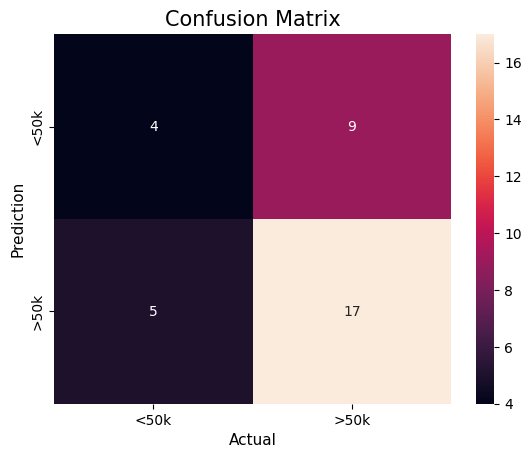

In [36]:
cm_clf_m1 = metrics.confusion_matrix(y1_test,y_pred_)

sns.heatmap(cm_clf_m1,annot=True,fmt='g',
           xticklabels=['<50k','>50k'],
           yticklabels=['<50k','>50k'])
plt.ylabel('Prediction',fontsize=11)
plt.xlabel('Actual',fontsize=11)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [37]:
# Trying diffrent approach pther than the adding 1000 to each value of the relationship status to normalize the value

In [38]:
df_nomalized = df_main_wo_ohe.copy(deep=True)

In [39]:
df_nomalized['Relationship Status'] = df_nomalized['Relationship Status'] +1000

In [40]:
df_nomalized.sample(5)

,Age,Education Years,Experience Years,Relationship Status,Income,Income_binary
68,35,14,27,1000,64517,1
74,30,16,3,1001,48899,0
8,31,16,6,1002,62246,1
45,24,11,9,1002,54044,1
62,37,10,28,1001,74277,1


In [41]:
df_nomalized.corr()

,Age,Education Years,Experience Years,Relationship Status,Income,Income_binary
Age,1.000000,0.050776,0.183564,0.105475,0.168260,0.154087
Education Years,0.050776,1.000000,0.051420,0.050650,0.007441,-0.005582
Experience Years,0.183564,0.051420,1.000000,0.014426,0.062493,-0.087592
Relationship Status,0.105475,0.050650,0.014426,1.000000,-0.097065,-0.046341
Income,0.168260,0.007441,0.062493,-0.097065,1.000000,0.836626
Income_binary,0.154087,-0.005582,-0.087592,-0.046341,0.836626,1.000000


 Applying Machine Leanring MOdel to evaluate the effictiveness of normalization of the realtionship status to check weather it has any impact on the accuracy or not

In [42]:
X2 = df_nomalized.drop(['Income','Income_binary'],axis=1)
y2 = df_nomalized[['Income_binary']] 

In [43]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state=96,test_size=0.3,shuffle=True)

In [44]:
clf_2 = DecisionTreeClassifier()

clf_m2 = clf_2.fit(X2_train,y2_train)

y_pred2 = clf_m2.predict(X2_test)

In [45]:
print("Acuuracy Normalized :",metrics.accuracy_score(y2_test,y_pred2))

Acuuracy Normalized : 0.43333333333333335


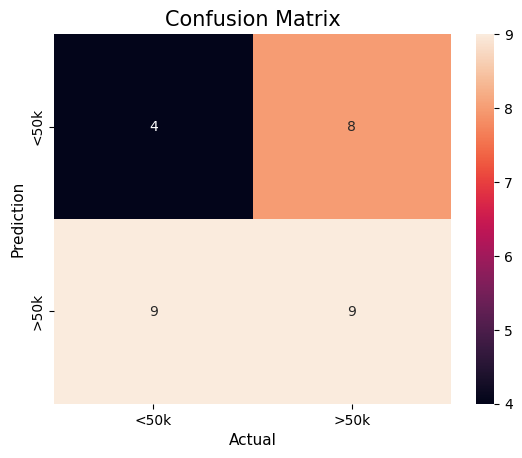

In [46]:
cm_clf_m2 = metrics.confusion_matrix(y2_test,y_pred2)

sns.heatmap(cm_clf_m2,annot=True,fmt='g',
           xticklabels=['<50k','>50k'],
           yticklabels=['<50k','>50k'])
plt.ylabel('Prediction',fontsize=11)
plt.xlabel('Actual',fontsize=11)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

Tried diffrent approach to achieve the higher accuracy with the same model Decision tree but the maximum acuracy obtained was only 60 percent and that was without one hot encoding 

Still i will try with different approach to achieve higher accuracy 